In [1]:
import pandas as pd

df = pd.read_csv("datasets/netflix_titles_2019.csv")
df_imdb = pd.read_pickle("imdb_2019.pkl")

In [2]:
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

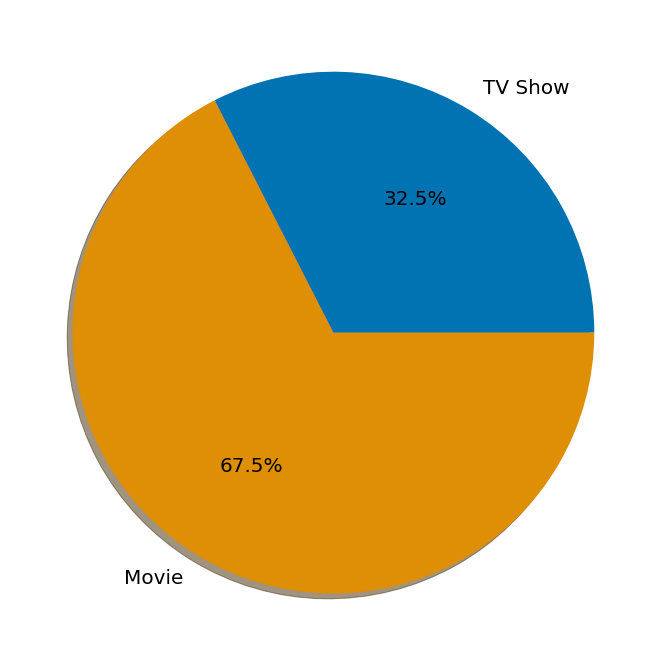

In [4]:
colors = sns.color_palette('colorblind')

content_type = Counter(df['type'])

plt.figure(figsize=(12, 12))
plt.pie(x = [_ for _ in content_type.values()], labels = content_type.keys(), colors = colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 20})

plt.show()

In [5]:
def attr_finder(attribute, country, type):
    df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small_df = df[df["from"] == 1]
    if type.lower() == "movie":
        small_df = small_df[small_df['type'] == "Movie"]
    elif type.lower() == "tv show":
        small_df = small_df[small_df['type'] == "TV Show"]
    else:
        small_df = small_df
    filter = ", ".join(small_df[attribute].fillna("")).split(", ")
    results = Counter(filter).most_common(11)
    labels = [att[0] for att in results if att[0] != ""]
    values = [att[1] for att in results if att[0] != ""]
               
    return labels[:10], values[:10]

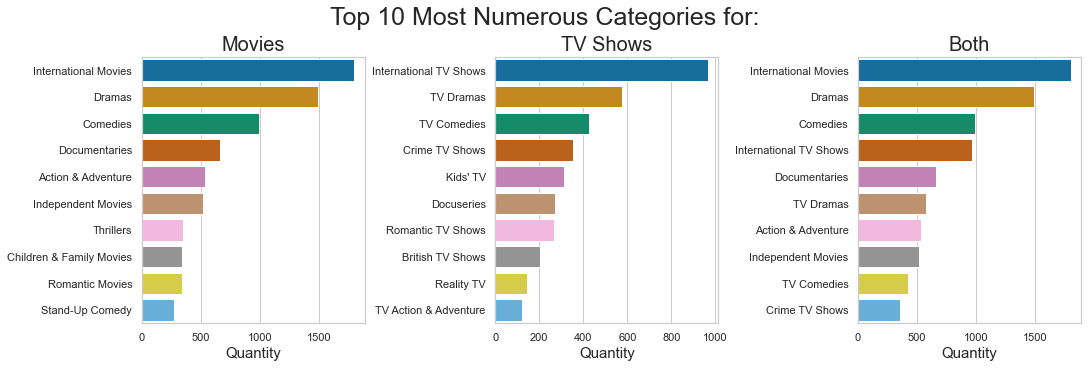

In [6]:
content_type = ["Movie", "TV Show", "all"]
graphs = []
for content in content_type:
    graphs.append(attr_finder("listed_in", "", content))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout = True)
fig.suptitle('Top 10 Most Numerous Categories for:', fontsize = 25)

sns.barplot(ax=axes[0], y=graphs[0][0], x=graphs[0][1]).set_xlabel("Quantity", fontsize = 15)
axes[0].set_title("Movies", fontsize = 20)
sns.barplot(ax=axes[1], y=graphs[1][0], x=graphs[1][1]).set_xlabel("Quantity", fontsize = 15)
axes[1].set_title("TV Shows", fontsize = 20)
sns.barplot(ax=axes[2], y=graphs[2][0], x=graphs[2][1]).set_xlabel("Quantity", fontsize = 15)
axes[2].set_title("Both", fontsize = 20)

plt.show()

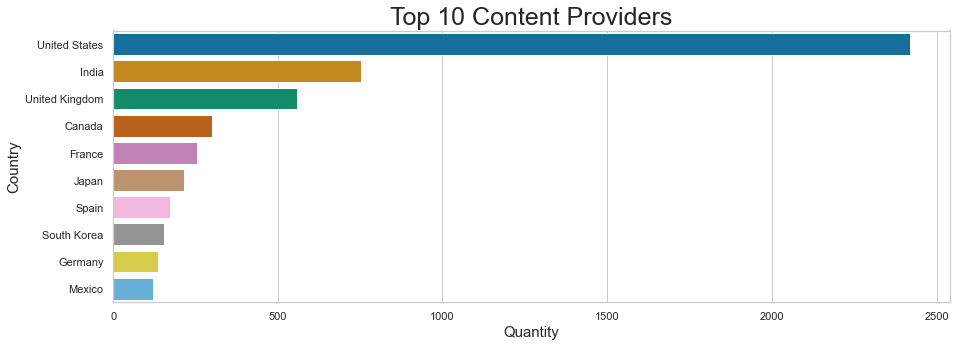

In [7]:
data = attr_finder("country", "", "")

sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})

graph = sns.barplot(y=data[0], x=data[1])
graph.set_xlabel("Quantity", fontsize = 15)
graph.set_ylabel("Country", fontsize = 15)
graph.set_title("Top 10 Content Providers", fontsize = 25)

plt.show()

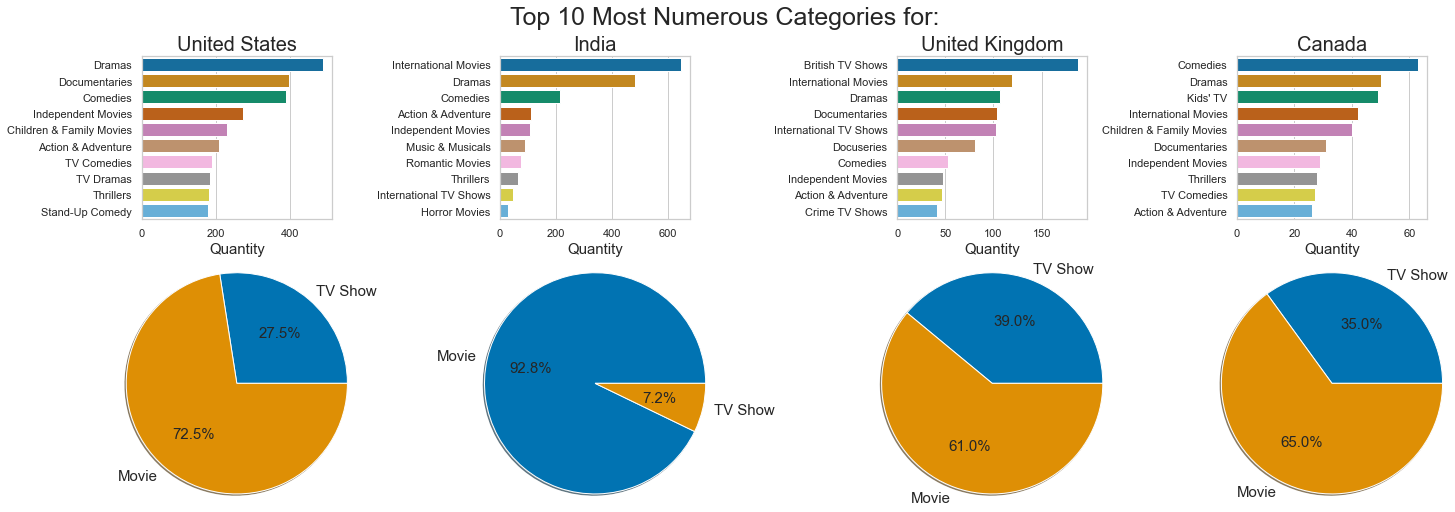

In [8]:
countries = data[0][:4]
content_cat = []
type_perc = []

for country in countries:
    content_cat.append(attr_finder("listed_in", country, "all"))
    df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small_df = df[df["from"] == 1]
    type_perc.append(Counter(small_df['type']))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(2, 4, figsize=(20,7), constrained_layout = True)
fig.suptitle('Top 10 Most Numerous Categories for:', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=content_cat[i][0], x=content_cat[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title(countries[i], fontsize = 20)
    
for i in range(4):
    plt.subplot2grid((2,4),(1,i))
    plt.pie(x = [_ for _ in type_perc[i].values()], labels = type_perc[i].keys(), colors = colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, radius = 1.7)

plt.show()

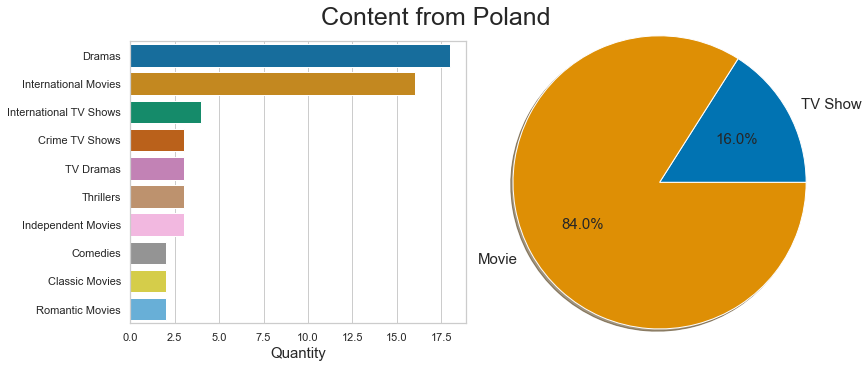

In [9]:
content_cat = []
type_perc = []

country = 'poland'
content_cat.append(attr_finder("listed_in", country, "all"))
df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
small_df = df[df["from"] == 1]
type_perc.append(Counter(small_df['type']))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 2, figsize=(12,5), constrained_layout = True)
fig.suptitle('Content from Poland', fontsize = 25)

sns.barplot(ax=axes[0], y=content_cat[0][0], x=content_cat[0][1]).set_xlabel("Quantity", fontsize = 15)
    
axes[1] = plt.pie(x = [_ for _ in type_perc[0].values()], labels = type_perc[0].keys(), colors = colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, radius = 1.3)

plt.show()

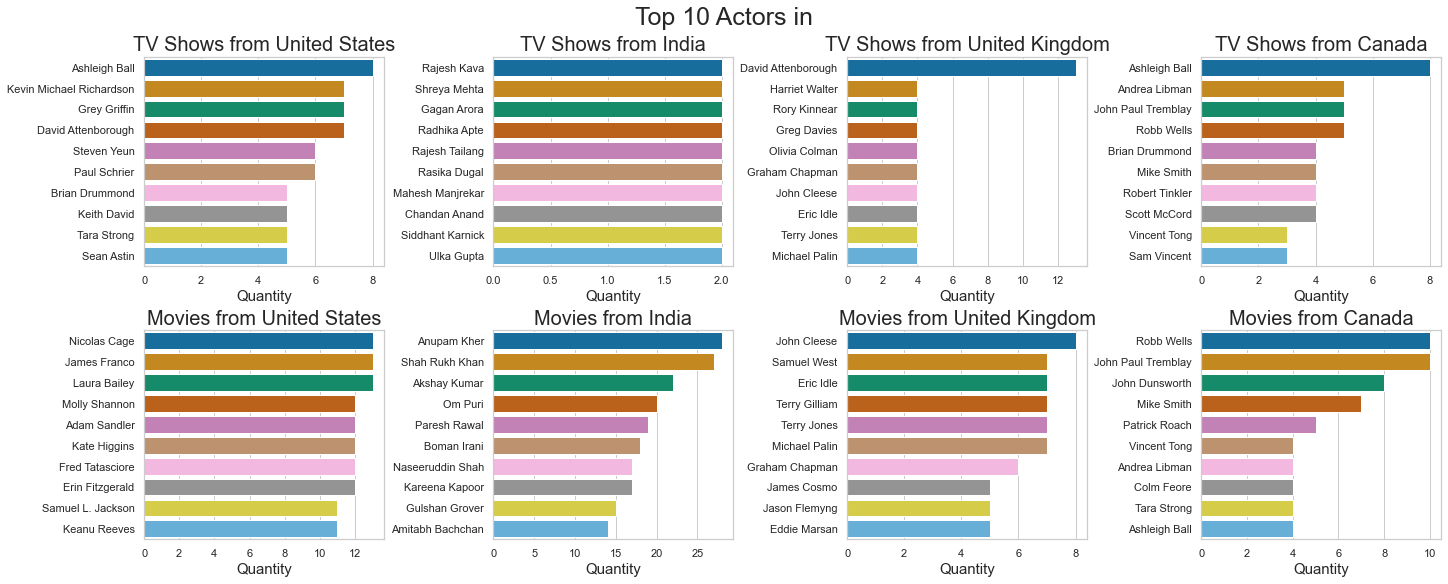

In [10]:
countries = data[0][:4]
actors_tv = []
actors_movie = []

for country in countries:
    actors_tv.append(attr_finder("cast", country, "TV Show"))
    actors_movie.append(attr_finder("cast", country, "Movie"))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(2, 4, figsize=(20,8), constrained_layout = True)
fig.suptitle('Top 10 Actors in', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=actors_tv[i][0], x=actors_tv[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title("TV Shows from " + countries[i], fontsize = 20)
    sns.barplot(ax=axes[1,i], y=actors_movie[i][0], x=actors_movie[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[1,i].set_title("Movies from " + countries[i], fontsize = 20)
    
plt.show()

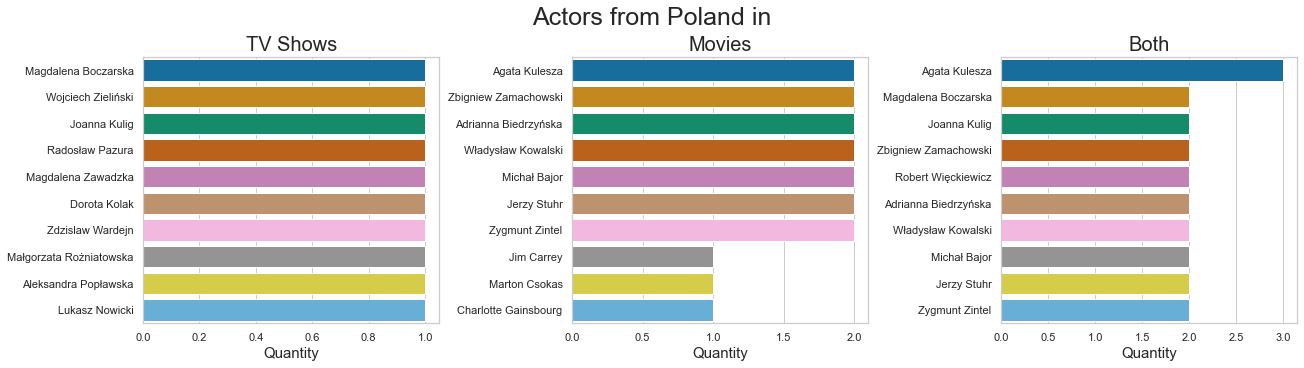

In [11]:
poland_tv = [attr_finder("cast", 'poland', "TV Show")]
poland_movie = [attr_finder("cast", "poland", "Movie")]
poland_all = [attr_finder("cast", "poland", "")]

df["from"] = df["country"].fillna("").apply(lambda x: 1 if "poland" in x.lower() else 0)
small_df = df[df["from"] == 1]

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 3, figsize=(18,5), constrained_layout = True)
fig.suptitle('Actors from Poland in', fontsize = 25)

sns.barplot(ax=axes[0], y=poland_tv[0][0], x=poland_tv[0][1]).set_xlabel("Quantity", fontsize = 15)
sns.barplot(ax=axes[1], y=poland_movie[0][0], x=poland_movie[0][1]).set_xlabel("Quantity", fontsize = 15)
sns.barplot(ax=axes[2], y=poland_all[0][0], x=poland_all[0][1]).set_xlabel("Quantity", fontsize = 15)
axes[0].set_title("TV Shows", fontsize = 20)
axes[1].set_title("Movies", fontsize = 20)
axes[2].set_title("Both", fontsize = 20)
    
plt.show()

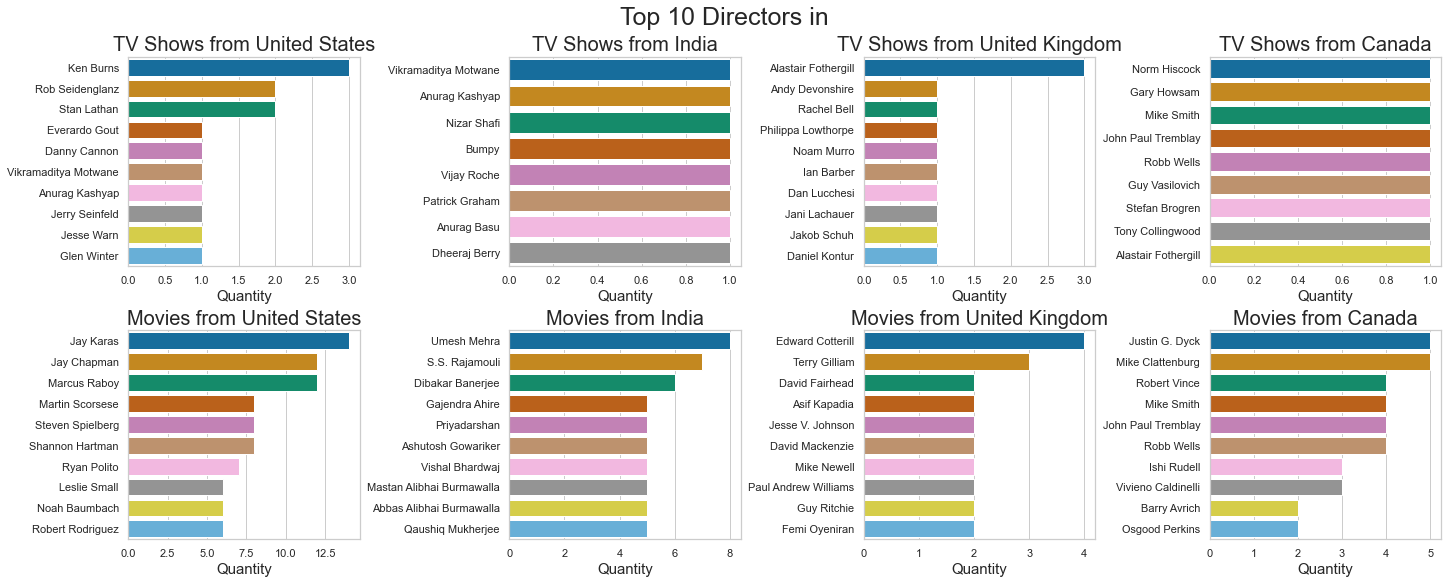

In [12]:
countries = data[0][:4]
director_tv = []
director_movie = []

for country in countries:
    director_tv.append(attr_finder("director", country, "TV Show"))
    director_movie.append(attr_finder("director", country, "Movie"))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(2, 4, figsize=(20,8), constrained_layout = True)
fig.suptitle('Top 10 Directors in', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=director_tv[i][0], x=director_tv[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title("TV Shows from " + countries[i], fontsize = 20)
    sns.barplot(ax=axes[1,i], y=director_movie[i][0], x=director_movie[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[1,i].set_title("Movies from " + countries[i], fontsize = 20)
    
plt.show()

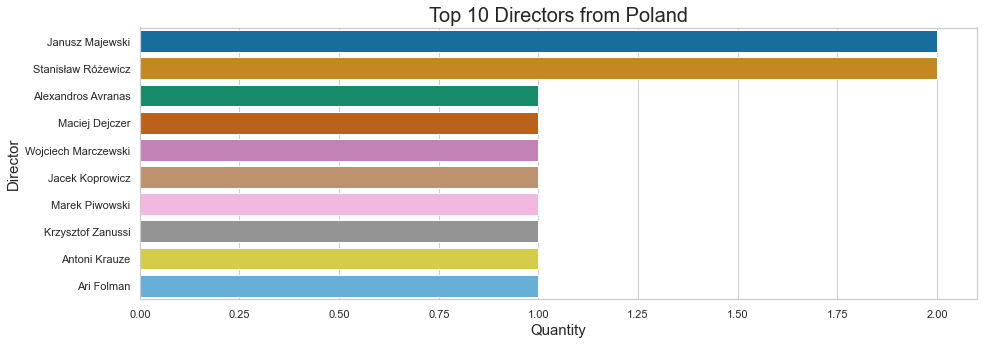

In [13]:
poland_all = [attr_finder("director", "poland", "")]

df["from"] = df["country"].fillna("").apply(lambda x: 1 if "poland" in x.lower() else 0)
small_df = df[df["from"] == 1]

sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})

fig = sns.barplot(y=poland_all[0][0], x=poland_all[0][1])
fig.set_xlabel("Quantity", fontsize = 15)
fig.set_ylabel("Director", fontsize = 15)
fig.set_title("Top 10 Directors from Poland", fontsize = 20)
    
plt.show()

In [32]:
df["duration"] = df["duration"].fillna("").apply(lambda x: x.split()[0])

content_duration = df.groupby(['release_year', 'type']).agg({'duration' : ['min', 'max', 'median','count']})
content_duration.columns = ["_".join(x) for x in content_duration.columns.ravel()]

content_duration

C:\Users\marty\AppData\Local\Temp\ipykernel_13456\3529554256.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  content_duration.columns = ["_".join(x) for x in content_duration.columns.ravel()]


duration_min duration_max  duration_median  \
release_year type                                                 
1925         TV Show            1            1              1.0   
1942         Movie             18           52             35.0   
1943         Movie             45           82             61.0   
1944         Movie             40           76             40.0   
1945         Movie             32           63             59.0   
...                           ...          ...              ...   
2018         Movie            100           99             95.0   
             TV Show            1            9              1.0   
2019         Movie             10           99             92.0   
             TV Show            1            8              1.0   
2020         TV Show            1            1              1.0   

                      duration_count  
release_year type                     
1925         TV Show               1  
1942         Movie                 2  
1943         Movie                 3  
1944         Movie                 3  
1945         Movie                 3  
...                              ...  
2018         Movie               630  
             TV Show             410  
2019         Movie               347  
             TV Show             415  
2020         TV Show               1  

[113 rows x 4 columns]

In [34]:
df[df['release_year']== 1925]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,from
2154,81030762,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1,TV Shows,This collection restores films from women who ...,TV Show,0
